In [2]:
import math
import matplotlib.pyplot as plt

In [49]:
class Binomial():
    """ Binomial distribution class for calculating and 
    visualizing a Binomial distribution.
    
    Attributes:
        mean (float) the mean value
        stdev (float) the standard deviation
        data_list (list of floats) a list of floats extracted from the data file
        p (float) the probability of an event occurring
        n (int) number of trials
    """
    
    def __init__(self, prob = 0.5, size = 20):
        
        self.n = size
        self.p = prob
        self.mean = self.calculate_mean()
        self.stdev = self.calculate_stdev()
        self.data = []
    
    def calculate_mean(self):
        """ Function to calculate the mean from p and n
        
        Args: 
            None
        
        Returns: 
            float: mean of the data set
        """
        
        self.mean = self.p*self.n
        
        return self.mean
    
    def calculate_stdev(self):
        """ Function to calculate the standard deviation from p and n.
        
        Args: 
            None
        
        Returns: 
            float: standard deviation of the data set
        """
        
        self.stdev = math.sqrt(self.n*self.p*(1-self.p))
        
        return self.stdev
    
    def replace_stats_with_data(self):
        """Function to calculate p and n from the data set
        
        Args: 
            None
        
        Returns: 
            float: the p value
            float: the n value
        """
        
        self.n = len(self.data)
        self.p = 1.0*sum(self.data)/len(self.data)
        self.mean = self.calculate_mean()
        self.stdev = self.calculate_stdev()
        
        return self.p, self.n
    
    def read_data_file(self, file_name, sample = True):
        """ Function to read in data from a txt file. The txt file should have
        one number per line. The number are stored in the data attribute. 

        Args:
            file_name (string): name of a file to read from

        Returns: 
            None    
        """
        
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
        
        self.data = data_list
        self.replace_stats_with_data()
        
    def plot_bar(self):
        """ Function to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        
        Args:
            None
            
        Returns:
            None
        """
                
        plt.bar(x = ['0','1'], height = [(1-self.p)*self.n,self.p*self.n])
        plt.title('Bar Chart of Data')
        plt.xlabel('outcome')
        plt.ylabel('count')
        
    def pdf(self, k):
        """ Probability density function calculator for the binomial distribution.
        
        Args:
            x (float): point for calculating the probability density function
        
        Returns:
            float: probability density function output
        """
        
        a = math.factorial(self.n)/(math.factorial(k)*(math.factorial(self.n-k)))
        b = (self.p**k)*(1-self.p)**(self.n-k)
        
        return a*b
    
    def plot_bar_pdf(self):
        """ Function to plot the pdf of the binomial distribution
        
        Args:
            None
        
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot    
        """
        
        x = []
        y = []
        
        # calculate the x values to visualize
        for i in range(self.n+1):
            x.append(i)
            y.append(self.pdf(i))

        # make the plots
        plt.bar(x, y)
        plt.title('Distribution of Outcomes')
        plt.ylabel('Probability')
        plt.xlabel('Outcome')

        plt.show()

        return x, y
    
    def __add__(self, other):        
        """ Function to add together two Binomial distributions with equal p
        
        Args:
            other (Binomial): Binomial instance
            
        Returns:
            Binomial: Binomial distribution 
        """
        
        try:
            assert self.p == other.p, 'p values are not equal'
        except AssertionError as error:
            raise
        
        result = Binomial()
        result.n = self.n +other.n
        result.p = self.p
        result.calculate_mean()
        result.calculate_stdev()
        
        return result
    
    def __repr__(self): 
        """ Function to output the characteristics of the Binomial instance
        
        Args:
            None
        
        Returns:
            string: characteristics of the Gaussian 
        """
        
        return "mean: {}, standard deviation: {}, p: {}, n: {}".format(self.mean, self.stdev, self.p, self.n)

In [50]:
binomial_one = Binomial()
binomial_one.read_data_file('numbers_binomial.txt')

In [51]:
binomial_one

mean: 8.0, standard deviation: 1.7541160386140584, p: 0.6153846153846154, n: 13

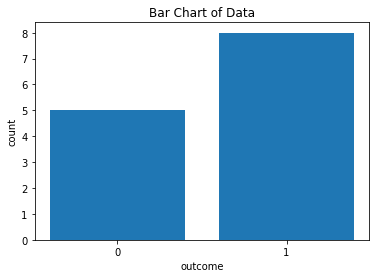

In [52]:
binomial_one.plot_bar()

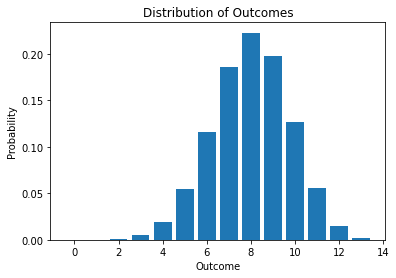

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [4.030384466833637e-06,
  8.383199691013968e-05,
  0.0008047871703373409,
  0.0047214180659790675,
  0.01888567226391627,
  0.054390736120078866,
  0.11603357038950161,
  0.1856537126232026,
  0.22278445514784312,
  0.19803062679808284,
  0.12673960115077304,
  0.05530455322942824,
  0.014747880861180866,
  0.0018151237982991838])

In [53]:
binomial_one.plot_bar_pdf()

In [56]:
binomial_one = Binomial(.4, 20)
binomial_two = Binomial(.4, 60)

binomial_sum = binomial_one + binomial_two

binomial_sum

mean: 32.0, standard deviation: 4.381780460041329, p: 0.4, n: 80